In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

%matplotlib inline

In [2]:
import pickle

goal_set = pickle.load(open('../synthetic_dataset/goal_set.p', 'rb'))
slot_set = pickle.load(open('../synthetic_dataset/slot_set.p', 'rb'))

In [3]:
train_data = goal_set['train']
test_data = goal_set['test']

total_data = train_data + test_data

In [4]:
# 증상 집합 초기화
symptom_set = set()

# 각 데이터에서 증상 추출
for data in train_data:
    explicit_symptoms = data['goal']['explicit_inform_slots'].keys()
    implicit_symptoms = data['goal']['implicit_inform_slots'].keys()
    
    # 추출된 증상 집합에 추가
    symptom_set.update(explicit_symptoms)
    symptom_set.update(implicit_symptoms)

# 결과 출력
# print("증상 집합:", symptom_set)
print(total_data)

[{'consult_id': 1059, 'disease_tag': 'Central retinal artery or vein occlusion', 'group_id': '7', 'goal': {'request_slots': {'disease': 'UNK'}, 'explicit_inform_slots': {'Spots or clouds in vision': True}, 'implicit_inform_slots': {'Diminished vision': True, 'Symptoms of eye': True, 'Pain in eye': True}}}, {'consult_id': 19510, 'disease_tag': 'Degenerative disc disease', 'group_id': '6', 'goal': {'request_slots': {'disease': 'UNK'}, 'explicit_inform_slots': {'Shoulder pain': True}, 'implicit_inform_slots': {'Back pain': True, 'Low back pain': True, 'Neck pain': True, 'Hip pain': True, 'Ache all over': True}}}, {'consult_id': 25630, 'disease_tag': 'Diabetic retinopathy', 'group_id': '4', 'goal': {'request_slots': {'disease': 'UNK'}, 'explicit_inform_slots': {'Foreign body sensation in eye': True}, 'implicit_inform_slots': {}}}, {'consult_id': 1467, 'disease_tag': 'Chronic back pain', 'group_id': '13', 'goal': {'request_slots': {'disease': 'UNK'}, 'explicit_inform_slots': {'Low back pain

In [5]:
len(symptom_set)

266

In [9]:
# 증상과 질병을 속성으로 하는 데이터셋 생성

dataset = []
for item in total_data:

    disease = item.get('disease_tag', '')
    
    # 증상 유무를 나타내는 피처 초기화
    symptom_features = {symptom: 0 for symptom in symptom_set}
    
    # explicit 증상 업데이트
    for symptom in item['goal'].get('explicit_inform_slots', {}).keys():
        symptom_features[symptom] = 1
    
    # implicit 증상 업데이트
    for symptom in item['goal'].get('implicit_inform_slots', {}).keys():
        symptom_features[symptom] = 1
    
    # 데이터셋에 추가
    dataset.append({**{'disease': disease}, **symptom_features})

# 데이터프레임으로 변환
df = pd.DataFrame(dataset)

df

disease  Dry or flaky scalp  \
0      Central retinal artery or vein occlusion                   0   
1                     Degenerative disc disease                   0   
2                          Diabetic retinopathy                   0   
3                             Chronic back pain                   0   
4                                  Air embolism                   0   
...                                         ...                 ...   
29995                       Conversion disorder                   0   
29996                                 Flat feet                   0   
29997                         Alzheimer disease                   0   
29998                         Chronic back pain                   0   
29999                              Fibromyalgia                   0   

       Vaginal pain  Knee swelling  Spotting or bleeding during pregnancy  \
0                 0              0                                      0   
1                 0              0                                      0   
2                 0              0                                      0   
3                 0              0                                      0   
4                 0              0                                      0   
...             ...            ...                                    ...   
29995             0              0                                      0   
29996             0              0                                      0   
29997             0              0                                      0   
29998             0              0                                      0   
29999             0              0                                      0   

       Wrist pain  Painful urination  Itchiness of eye  Allergic reaction  \
0               0                  0                 0                  0   
1               0                  0                 0                  0   
2               0                  0                 0                  0   
3               0                  0                 0                  0   
4               1                  0                 0                  0   
...           ...                ...               ...                ...   
29995           0                  0                 0                  0   
29996           0                  0                 0                  0   
29997           0                  0                 0                  0   
29998           0                  0                 0                  0   
29999           0                  0                 0                  0   

       Weakness  ...  Lower abdominal pain  Heavy menstrual flow  \
0             0  ...                     0                     0   
1             0  ...                     0                     0   
2             0  ...                     0                     0   
3             0  ...                     0                     0   
4             0  ...                     0                     0   
...         ...  ...                   ...                   ...   
29995         1  ...                     0                     0   
29996         0  ...                     0                     0   
29997         0  ...                     0                     0   
29998         0  ...                     0                     0   
29999         0  ...                     0                     0   

       Hip stiffness or tightness  Long menstrual periods  \
0                               0                       0   
1                               0                       0   
2                               0                       0   
3                               0                       0   
4                               0                       0   
...                           ...                     ...   
29995                           0                       0   
29996                           

In [10]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# 데이터셋 예시 (이미 생성한 데이터셋을 사용)
# df = pd.DataFrame(dataset)

# 질병을 제외한 특성 데이터 추출
X = df.drop('disease', axis=1)

# 질병 데이터 추출
y = df['disease']

# Information Gain 계산
info_gain = mutual_info_classif(X, y)

# 결과 출력
feature_info_gain = pd.Series(info_gain, index=X.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)
print(feature_info_gain)

Skin rash                                         0.248451
Pain in eye                                       0.218996
Diminished vision                                 0.181056
Back pain                                         0.179567
Wrist pain                                        0.168952
Depressive or psychotic symptoms                  0.168651
Headache                                          0.167453
Sharp abdominal pain                              0.151420
Anxiety and nervousness                           0.150545
Skin lesion                                       0.150496
Fever                                             0.146655
Fatigue                                           0.141553
Loss of sensation                                 0.138821
Leg pain                                          0.138717
Depression                                        0.134937
Itching of skin                                   0.133672
Ankle pain                                        0.1286

빈도가 낮게 나타나는 증상들은 정보력이 적어서 낮게나옴 
informaion gain을 고려하여 모델에 적용해보면 좋을듯 


결정트리

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 특성과 타겟 변수 분리
X = df.drop('disease', axis=1)
y = df['disease']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결정 트리 모델 학습
clf = DecisionTreeClassifier(random_state=42)  #max_depth
clf.fit(X_train, y_train)

# 예측
y_pred = clf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 76.40%


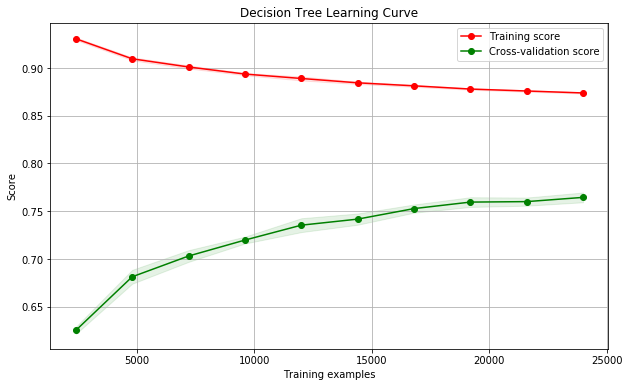

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 과적합 확인하기 위한
# 학습 곡선 함수 정의
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")
    plt.show()

# 결정 트리 모델로 학습 곡선 그리기
plot_learning_curve(clf, X, y, "Decision Tree Learning Curve")

decesion tree모델.
라이브러리 이용해서 학습해봤는데 tree깊이를 늘리면 정확도는 늘어나지만 과적합됨

In [126]:
# 예측 확률 계산
y_pred_proba = clf.predict_proba(X_test)

# 입력 'Spots or clouds in vision'에 대한 예측 확률
# 입력 데이터 생성
input_data = pd.DataFrame(0, index=range(1), columns=df.columns.drop('disease'))
input_data['Spots or clouds in vision'] = 1
input_proba = clf.predict_proba(input_data)

# 상위 5개 클래스 및 확률 출력
sorted_indices = input_proba.argsort()[0][::-1]

print("입력 'Spots or clouds in vision'에 대한 상위 5개 예측")
for i in range(5):
    class_label = clf.classes_[sorted_indices[i]]
    probability = input_proba[0, sorted_indices[i]]
    print(f"{i+1}등 - {class_label}: {probability}")

입력 'Spots or clouds in vision'에 대한 상위 5개 예측
1등 - Aphakia: 0.2727272727272727
2등 - Cystic Fibrosis: 0.22727272727272727
3등 - Acute glaucoma: 0.22727272727272727
4등 - Diabetic retinopathy: 0.18181818181818182
5등 - Central retinal artery or vein occlusion: 0.09090909090909091


In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 전처리
X = df.drop('disease', axis=1)
y = df['disease']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결정 트리 모델 학습
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# 특성 중요도 확인
feature_importances = clf.feature_importances_
important_features = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

# 예측
y_pred = clf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 특성 중요도 출력
print(important_features)

Accuracy: 75.25%
Skin rash                           5.851899e-02
Pain in eye                         4.906797e-02
Back pain                           3.929194e-02
Depressive or psychotic symptoms    3.607046e-02
Headache                            3.440570e-02
                                        ...     
Pain during intercourse             8.465393e-07
Symptoms of bladder                 0.000000e+00
Pus in urine                        0.000000e+00
Hysterical behavior                 0.000000e+00
Frequent menstruation               0.000000e+00
Length: 266, dtype: float64


In [129]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 특성과 타겟 변수 분리
X = df.drop('disease', axis=1)
y = df['disease']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y_train = le.fit_transform(y_train)


model = XGBClassifier(n_estimators=100, tree_method='hist',
                    max_depth=20, learning_rate=0.1, random_state=0)

model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 0.00%
